In [1]:
from scipy.integrate import ode, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os, sys
import matplotlib.pyplot as plt

import bisect

import pints
import myokit
import myokit.pacing as pacing

sys.path.append('../../../JKLib')
from pythonJK import create_folder

sys.path.append('../../Protocols')
from pacing_protocol import PacingProtocol

from br1977_scipy import BR1977

In [2]:
result_folder = './Figures'
create_folder(result_folder)

The folder already exists.


In [3]:
protocol = PacingProtocol(level=1, start=100, length=2, period=1000, multiplier=0, default_time_unit='ms')
model = BR1977(protocol)

In [4]:
times = np.linspace(0, 2000, 5000)
print(times.shape, times.max())
# voltage = kylie.voltage(times)

AP = model.simulate(times)
print("Simulation done.")

(5000,) 2000.0
Simulation done.


In [5]:
times = model.solver.t
print(times.shape)
print(AP.shape)

(5000,)
(5000,)


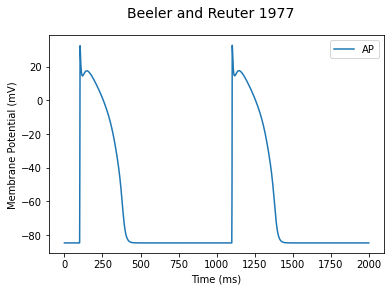

In [6]:
fig, ax = plt.subplots(figsize=(6,4))    
fig.suptitle('Beeler and Reuter 1977', fontsize=14)
# ax.set_title('Simulation %d'%(simulationNo))
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')     
ax.plot(times, AP, label='AP')    
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join(result_folder, "AP.jpg"), dpi=100)

In [7]:
print("finish")

finish
